In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [4]:
def graficar_seriesdetiempo(axes, x, y, color, xlabel, ylabel):
    
    ''' Esta función grafica una serie de tiempo, toma el axes, los valores del eje x, los valores del el eje y, el color y los nombres de los ejes
        
        Argumentos:
        
        axes: El axes con el que se está trabajando
        x: Fechas del eje x (usualmente va el índice)
        y: Valores del eje y
        color: Color del axes
        xlabel: Nombre del eje x
        ylabel: Nombre del eje y
    
    '''
    
    axes.plot(x, y, color = color)
    
    axes.set_xlabel(xlabel)
    
    axes.set_ylabel(ylabel, color = color)
    
    axes.tick_params(axis = 'y', colors = color)
    

In [23]:
def graficar_seriesdetiempo_max(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params(axis='y', colors=color)

    # Encuentra el punto más alto en la serie de datos
    punto_maximo = (x[np.argmax(y)], max(y))

    # Agrega una flecha y texto al punto más alto del CPI
    axes.annotate('Punto Máximo',
                  xy=punto_maximo,  # Coordenadas del punto máximo
                  xytext=(punto_maximo[0] + pd.DateOffset(years=2), punto_maximo[1] - 2),  # Desplazamiento del texto
                  textcoords='data',  # Coordenadas del texto
                  arrowprops=dict(arrowstyle='->', color='blue'))

https://finance.yahoo.com/trending-tickers/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANEGdKNrSGifeQGB3HPN2IeyEukeMeFdzRHuAegb021SUGmMr2bIk1rYzBMch5TSnqDh9vAv3ApYjZEFmbqqnp9bvLdAoVxGhamAvjIb-gphjirVaRfX4Lr-JFYQgqdoS11Crm5ZC2HXzCG7nDI2zVZ0ZWglXGNOHzlYYI4GAPQV

In [39]:
finance = yf.download(["AAPL",  "NOK", "AMZN", "XOM"], start="2011-01-01", end="2021-12-31")
finance = finance["Close"]
finance

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,NOK,XOM
Date,,,,
2011-01-03,11.770357,9.211000,10.66,74.550003
2011-01-04,11.831786,9.250500,10.86,74.900002
2011-01-05,11.928571,9.371000,10.66,74.699997
2011-01-06,11.918929,9.293000,10.59,75.180000
2011-01-07,12.004286,9.274500,10.51,75.589996
...,...,...,...,...
2021-12-23,176.279999,171.068497,6.19,61.020000
2021-12-27,180.330002,169.669495,6.34,61.889999
2021-12-28,179.289993,170.660995,6.30,61.689999


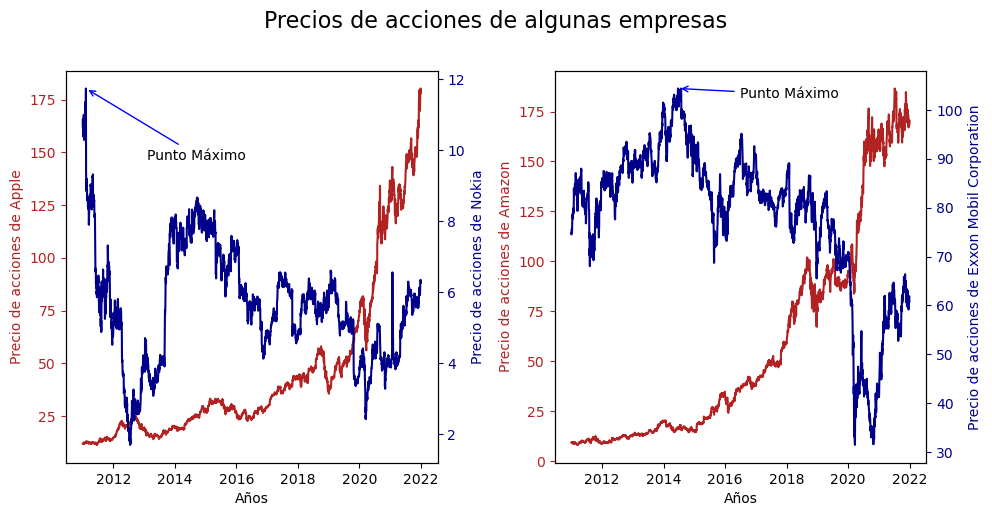

In [46]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

graficar_seriesdetiempo(axs[0], finance.index, finance.AAPL, 
                        "#B22222", 'Años', 'Precio de acciones de Apple')

ax1 = axs[0].twinx()

graficar_seriesdetiempo_max(ax1, finance.index, finance.NOK, 
                        "darkblue", 'Años', 'Precio de acciones de Nokia')

graficar_seriesdetiempo(axs[1], finance.index, finance.AMZN, 
                        "#B22222", 'Años', 'Precio de acciones de Amazon')


ax2 = axs[1].twinx()

graficar_seriesdetiempo_max(ax2, finance.index, finance.XOM, 
                        "darkblue", 'Años', 'Precio de acciones de Exxon Mobil Corporation')

fig.suptitle('Precios de acciones de algunas empresas', y=1.02, fontsize=16)

fig.tight_layout(pad=1.0)



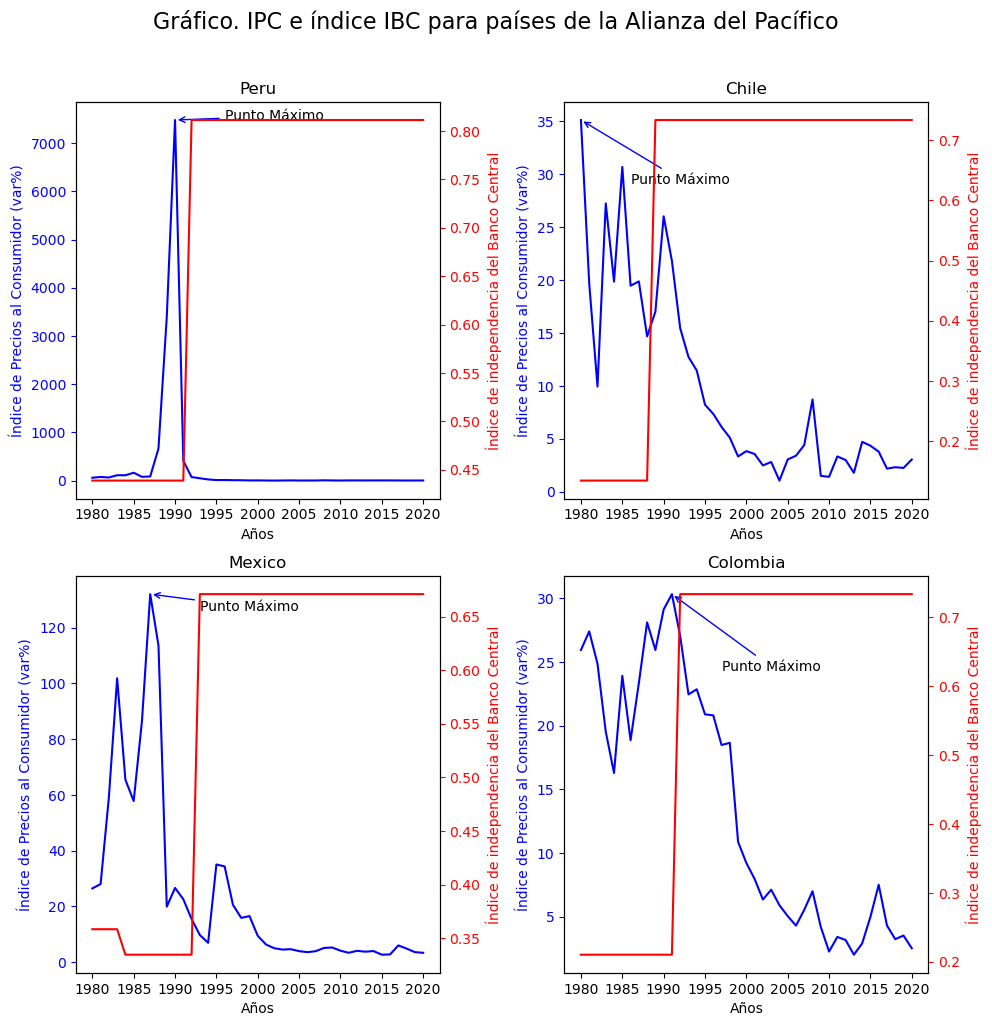

In [9]:
# TAREA: Grafiquemos los cuatro cuadros en un solo gráfico

def graficar_seriesdetiempo_max(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params(axis='y', colors=color)

    # Encuentra el punto más alto en la serie de datos
    punto_maximo = (x[np.argmax(y)], max(y))

    # Agrega una flecha y texto al punto más alto del CPI
    axes.annotate('Punto Máximo',
                  xy=punto_maximo,  # Coordenadas del punto máximo
                  xytext=(punto_maximo[0] + pd.DateOffset(years=6), punto_maximo[1] - 6),  # Desplazamiento del texto
                  textcoords='data',  # Coordenadas del texto
                  arrowprops=dict(arrowstyle='->', color='blue'))

# Países y colores para los gráficos
paises = ["Peru", "Chile", "Mexico", "Colombia"]
colores = ['blue', 'red']

# Crear una figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Gráfico. IPC e índice IBC para países de la Alianza del Pacífico', y=1.02, fontsize=16)

for i, pais in enumerate(paises):
    row = i // 2
    col = i % 2

    ax = axs[row, col]
    ax.set_title(pais)

    cbi_ipc_pais = cbi_ipc[cbi_ipc["Country"] == pais]
    
    graficar_seriesdetiempo_ipc(ax, cbi_ipc_pais.index, cbi_ipc_pais.CPI, 
                        "blue", 'Años', 'Índice de Precios al Consumidor (var%)')
    
    ax2 = ax.twinx()

    graficar_seriesdetiempo(ax2, cbi_ipc_pais.index, cbi_ipc_pais.CBI, 
                        "red", 'Años', 'Índice de independencia del Banco Central')    
    
# Ajustar el diseño y guardar la figura
fig.tight_layout(pad=1.0)
plt.savefig("images\IPC y CBI para países seleccionados.png", bbox_inches='tight', dpi=300)

plt.show()